# Otter Assign for R Sample

In [28]:
library(ggplot2)
library(latex2exp)
rng_seed = 42

**Question 1.** Write a function called `sieve` that takes in a positive integer `n` and returns a `set` of the prime numbers less than or equal to `n`. Use the Sieve of Eratosthenes to find the primes.

In [29]:
sieve = function(n) {
    # BEGIN SOLUTION
    is_prime = rep(TRUE, n)
    p = 2
    while (p^2 <= n) {
        if (is_prime[p]) {
            is_prime[seq(p^2, n, p)] = FALSE
        }
        p = p + 1
    }
    is_prime[1] = FALSE
    return(seq(n)[is_prime])
    # END SOLUTION
}

In [30]:
testthat::expect_equal(length(sieve(1)), 0)

In [31]:
testthat::expect_equal(sieve(2), c(2))

In [32]:
testthat::expect_equal(sieve(3), c(2, 3))

In [33]:
# HIDDEN
testthat::expect_equal(sieve(20), c(2, 3, 5, 7, 11, 13, 17, 19))

In [34]:
. = " # BEGIN TEST CONFIG
points: 1
hidden: true
" # END TEST CONFIG
testthat::expect_equal(sieve(100), c(2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97))

**Question 2.** Evaluate the integral:

$$
\int x e^x \, \mathrm dx
$$

$$
\begin{aligned}
\int x e^x \, \mathrm dx &= \texttt{YOUR MATH HERE} \\
\end{aligned}
$$

**SOLUTION:**

$$
\begin{aligned}
\int x e^x \, \mathrm dx &= x e^x - \int e^x \, \mathrm dx \\
&= x e^x - e^x + C \\
&= e^x (x - 1) + C \\
\end{aligned}
$$

**Question 3.** Graph the function $f(x) = \arctan \left ( e^x \right )$.

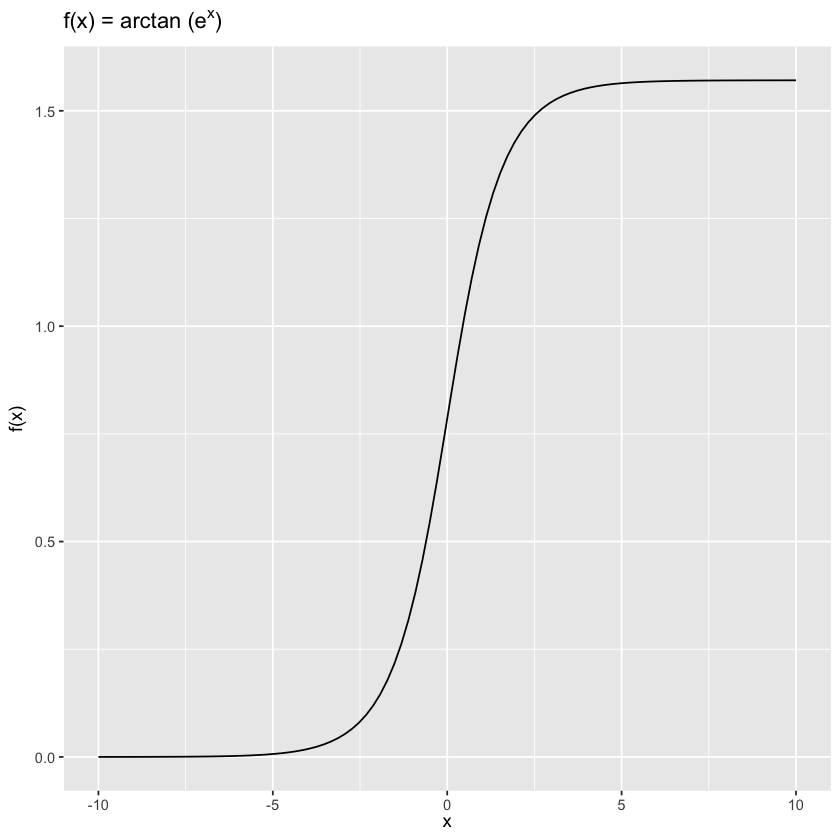

In [35]:
# BEGIN SOLUTION
xs = seq(-10, 10, length.out=100)
ys = atan(exp(xs))

ggplot(data.frame(xs, ys), aes(x=xs, y=ys)) +
    geom_line() +
    xlab(TeX("$x$")) +
    ylab(TeX("$f(x)$")) +
    labs(title=TeX("f(x) = arctan (e^x)")) +
    theme(legend.position = "none")
# END SOLUTION

**Question 4.** Write a function `hailstone` that returns the hailstone sequence for a positive integer ``n`` as a ``list``.

In [36]:
hailstone = function(n) {
    # BEGIN SOLUTION
    if (n == 1) return(c(n))
    else if (n %% 2 == 0) return(c(n, hailstone(n %/% 2)))
    else return(c(n, hailstone(3 * n + 1)))
    # END SOLUTION
}

In [37]:
testthat::expect_equal(hailstone(1), c(1))

In [38]:
testthat::expect_equal(hailstone(2), c(2, 1))

In [39]:
testthat::expect_equal(hailstone(4), c(4, 2, 1))

In [40]:
. = " # BEGIN TEST CONFIG
points: 1.5
hidden: true
" # END TEST CONFIG
testthat::expect_equal(hailstone(20), c(20, 10, 5, 16, 8, 4, 2, 1))

In [41]:
. = " # BEGIN TEST CONFIG
points: 1.5
hidden: true
" # END TEST CONFIG
testthat::expect_equal(hailstone(9), c(9, 28, 14, 7, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1))

**Question 5.** Write a function ``gcd`` that takes in two positive integers ``a`` and ``b`` and returns their greatest common divisor.

In [42]:
gcd = function(a, b) {
    # BEGIN SOLUTION
    if (a == 0) return(b)
    return(gcd(b %% a, a))
    # END SOLUTION
}

In [43]:
testthat::expect_equal(gcd(1, 1), 1)

In [44]:
testthat::expect_equal(gcd(2, 1), 1)

In [45]:
testthat::expect_equal(gcd(5, 5), 5)

In [46]:
testthat::expect_equal(gcd(10, 4), 2)

In [47]:
. = " # BEGIN TEST CONFIG
points: 0.5
hidden: true
" # END TEST CONFIG
testthat::expect_equal(gcd(121, 11), 11)

In [48]:
. = " # BEGIN TEST CONFIG
points: 0.5
hidden: true
" # END TEST CONFIG
testthat::expect_equal(gcd(807306, 622896), 4098)

**Question 6.** Write a function `box_muller` that takes in two $U(0,1)$ random variables and returns two standard normal random variables using the Box-Muller algorithm. Use this function to generate 1000 standard normal random variables. Make sure to use the provided RNG to generate your $U(0,1)$ RVs.

In [49]:
set.seed(rng_seed)

box_muller = function(u1, u2) {
    # BEGIN SOLUTION
    r = sqrt(-2 * log(u1))
    theta = 2 * pi * u2
    return(c(r * cos(theta), r * sin(theta)))
    # END SOLUTION
}

rvs = as.vector(mapply(box_muller, runif(500), runif(500))) # SOLUTION

In [50]:
testthat::expect_equal(length(rvs), c(1000))
testthat::expect_equal(dim(rvs), NULL)

In [51]:
testthat::expect_equal(box_muller(0.5, 0.5), c(-1.1774100225154747, 1.4419114153575892e-16), tolerance=1e-5)

In [52]:
. = " # BEGIN TEST CONFIG
points: 1
hidden: true
" # END TEST CONFIG
set.seed(1048)
smpl = sample(rvs, 10)
testthat::expect_equal(smpl, c(0.488075015538835, 0.194588102062245, 0.166299257619479, 0.835872276439119, 1.24125215479332,
                               -0.249328292625541, -0.823870507269021, 0.610713558462346, -0.212479727693556, -1.63148721078593))